In [1]:
import sys
sys.path.append('..')
from matplotlib import pyplot as plt

from heat_load_calc.core import infiltration as e7

In [2]:
plt.style.use('seaborn-whitegrid')

# すきま風量の計算モジュールテスト
## get_infiltrationをテスト
    Args:
        c_value: 相当隙間面積, cm2/m2, [i, 1]
        v_room_cap_is: 室気積, m3, [i,1]
        story: 階
        vent_type: 換気方式, 第?種換気
        delta_theta: 内外温度差, degree C

    Returns:
        すきま風量, m3/s, [i,1]

## すきま風量には機械換気の風量は含まれない

In [3]:
c_value = 2.0

In [4]:
v_room_cap_is = 50.0

In [5]:
story = 2

In [6]:
vent_type = 3

In [7]:
delta_theta = [x for x in range(0, 20)]

In [8]:
c_value = 2.0

In [9]:
x1 = delta_theta

In [10]:
y1 = [(e7.get_infiltration(
        c_value=c_value,
        v_room_cap_is=v_room_cap_is,
        story=story,
        vent_type=1,
        delta_theta=dT
    ) / v_room_cap_is * 3600.) for dT in delta_theta]

In [11]:
y2 = [(e7.get_infiltration(
        c_value=c_value,
        v_room_cap_is=v_room_cap_is,
        story=story,
        vent_type=2,
        delta_theta=dT
    ) / v_room_cap_is * 3600.) for dT in delta_theta]

In [12]:
y3 = [(e7.get_infiltration(
        c_value=c_value,
        v_room_cap_is=v_room_cap_is,
        story=story,
        vent_type=3,
        delta_theta=dT
    ) / v_room_cap_is * 3600.) for dT in delta_theta]

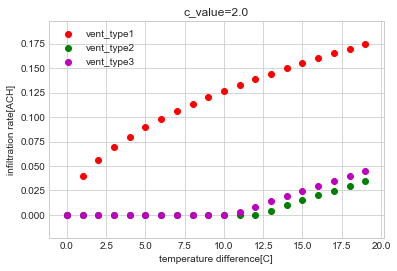

In [13]:
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.scatter(x1, y1, c="r", label="vent_type1")
ax1.scatter(x1, y2, c="g", label="vent_type2")
ax1.scatter(x1, y3, c="m", label="vent_type3")

ax1.set_xlabel('temperature difference[C]')
ax1.set_ylabel('infiltration rate[ACH]')

ax1.set_title("c_value=" + str(c_value))

plt.legend()
plt.show()

In [14]:
delta_theta = 10.0
c_value = [x for x in range(1,25)]

In [15]:
x1 = c_value

In [16]:
y1 = [(e7.get_infiltration(
        c_value=c,
        v_room_cap_is=v_room_cap_is,
        story=story,
        vent_type=1,
        delta_theta=delta_theta
    ) / v_room_cap_is * 3600.) for c in c_value]

In [17]:
y2 = [(e7.get_infiltration(
        c_value=c,
        v_room_cap_is=v_room_cap_is,
        story=story,
        vent_type=2,
        delta_theta=delta_theta
    ) / v_room_cap_is * 3600.) for c in c_value]

In [18]:
y3 = [(e7.get_infiltration(
        c_value=c,
        v_room_cap_is=v_room_cap_is,
        story=story,
        vent_type=3,
        delta_theta=delta_theta
    ) / v_room_cap_is * 3600.) for c in c_value]

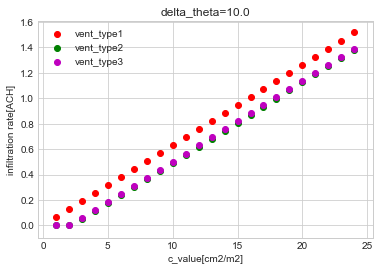

In [19]:
fig2 = plt.figure()
ax2 = fig2.subplots()

ax2.scatter(x1, y1, c="r", label="vent_type1")
ax2.scatter(x1, y2, c="g", label="vent_type2")
ax2.scatter(x1, y3, c="m", label="vent_type3")

ax2.set_xlabel('c_value[cm2/m2]')
ax2.set_ylabel('infiltration rate[ACH]')

ax2.set_title("delta_theta=" + str(delta_theta))

plt.legend()
plt.show()